<a href="https://colab.research.google.com/github/Conradtokoyo/MNIST-Data/blob/main/Kaggle_MINST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##MNIST model with Fastai

This notebook installs fast AI and grabs the MNIST dataset from Kaggle. It then trains and tests a model using fast ai and creates a csv file for submission to Kaggle.

Most of the foundation of the code was from lesson 2 of fastai's Practical Deep Learning for Coders found here https://course.fast.ai/.

The final submission to Kaggle got a public score of 0.97396.

Resources that contributed code to this notebook:
<br>
https://www.kaggle.com/stefanbuenten/mnist-test-with-fastai
<br>
https://www.kaggle.com/daneiref/yet-another-mnist-using-fastai


In [33]:
#hide
#install and import fastbook to colab
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [34]:
#hide
#import fast ai 
from fastai.vision.all import *
from fastbook import *
from fastai.vision.widgets import *

##Load Kaggle Data

This step requires a JSON file  generated from your user account.

Instructions can be found here:
<br>
https://towardsdatascience.com/how-to-use-kaggle-datasets-in-google-colab-bca5e452a676 

In [35]:
#Loading the json kaggle file to access kaggle data

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 67 bytes


In [36]:
#install mnist data
!kaggle competitions download -c digit-recognizer
!unzip train.csv.zip
!unzip test.csv.zip

train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
Archive:  train.csv.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               
Archive:  test.csv.zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                


In [37]:
#Import pandas and read training and testing data in dataframes
import pandas as pd 
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")


In [38]:
#create a dataframe to store labels, another without labels, df with values only, test value df and a path variable to set location of where to store images
label_df = train['label']
mod_train = train.drop(columns= 'label')
data_values = mod_train.values
test_data_values = test.values
PATH = Path('/content/gdrive/My Drive/mnist') 


#Create jpg images to train / validate / test model

In [ ]:
for i in range(0, len(data_values)):

    #read the correct label
    correct_label = label_df[i]

    #split the data into training and validation sets
    if np.random.rand() < 0.8:
        folder = '/train/'
        train_path = f'{PATH}' + '/train/' + str(correct_label)
        if not os.path.exists(train_path):
          os.makedirs(train_path)

    else:
        folder = '/valid/'
        valid_path = f'{PATH}' + '/valid/' + str(correct_label)
        if not os.path.exists(valid_path):
          os.makedirs(valid_path)
    
    img = data_values[i][:]

    #reshape into 28x28 pic
    img = img.reshape(28,28)

    #we need three channels into the picture
    img = np.stack((img,)*3,axis = -1)

    #change the data type to int8
    img = np.uint8(img)

    #create PIL Image
    new_img = Image.fromarray(img)

    #save the .jpg into correct folder
    new_img.save(f'{PATH}' + folder + str(correct_label) + '/' + str(i) + '.jpg', 'JPEG')

"for i in range(0, len(data_values)):\n\n    #read the correct label\n    correct_label = label_df[i]\n\n    #split the data into training and validation sets\n    if np.random.rand() < 0.8:\n        folder = '/train/'\n        train_path = f'{PATH}' + '/train/' + str(correct_label)\n        if not os.path.exists(train_path):\n          os.makedirs(train_path)\n\n    else:\n        folder = '/valid/'\n        valid_path = f'{PATH}' + '/valid/' + str(correct_label)\n        if not os.path.exists(valid_path):\n          os.makedirs(valid_path)\n    \n    img = data_values[i][:]\n\n    #reshape into 28x28 pic\n    img = img.reshape(28,28)\n\n    #we need three channels into the picture\n    img = np.stack((img,)*3,axis = -1)\n\n    #change the data type to int8\n    img = np.uint8(img)\n\n    #create PIL Image\n    new_img = Image.fromarray(img)\n\n    #save the .jpg into correct folder\n    new_img.save(f'{PATH}' + folder + str(correct_label) + '/' + str(i) + '.jpg', 'JPEG')"

Create test images from test_data_values

In [40]:
for i in range(0, len(test_data_values)):

    #create test images
    folder = '/test/'
    test_path = f'{PATH}' + '/test/' 
    if not os.path.exists(test_path):
      os.makedirs(test_path)
    
    img = test_data_values[i][:]

    #reshape into 28x28 pic
    img = img.reshape(28,28)

    #we need three channels into the picture
    img = np.stack((img,)*3,axis = -1)

    #change the data type to int8
    img = np.uint8(img)

    #create PIL Image
    new_img = Image.fromarray(img)

    #save the .jpg into correct folder
    new_img.save(f'{PATH}' + folder + str(i) + '.jpg', 'JPEG')

##Train Model

In [ ]:
mnist = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files,
    splitter = GrandparentSplitter(train_name = "train", valid_name = "valid"),
    get_y=parent_label,
    item_tfms=Resize(224))

dls = mnist.dataloaders(PATH)

In [ ]:
mnist = mnist.new(
        item_tfms = RandomResizedCrop(224, min_scale = 0.5),
        batch_tfms = aug_transforms())
dls = mnist.dataloaders(PATH,bs = 32)

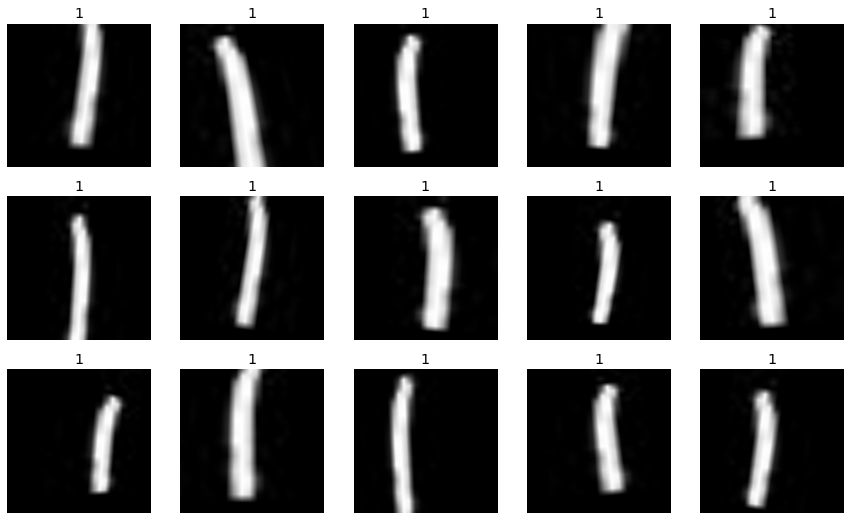

In [ ]:
dls.train.show_batch(max_n = 15, nrows = 3, unique = True)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=[error_rate,accuracy])

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [ ]:
learn.fit_one_cycle(2, 0.1)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.187154,3.289284,0.076831,0.923169,1:48:15
1,0.259774,0.089024,0.023539,0.976461,02:44


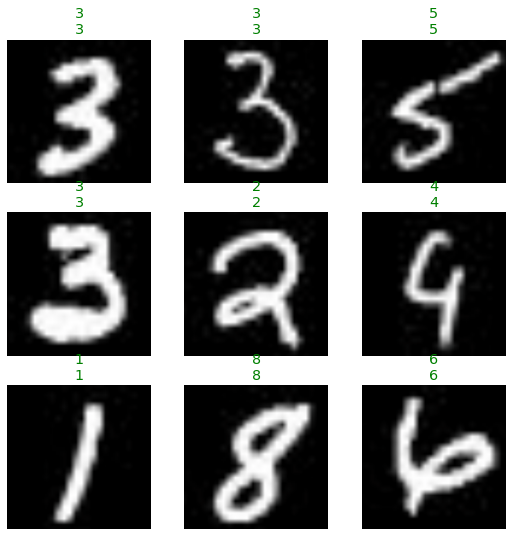

In [ ]:
learn.show_results()

### Exporting Model

In [41]:
learn.export(fname = str(PATH) + "/mnist_model.pkl")

In [42]:
learn_inf = load_learner(str(PATH) + "/mnist_model.pkl")

## Testing the model

In [43]:
#exported model predictions - steps

#get images to run
folder ='/content/gdrive/My Drive/mnist/test/'
images = get_image_files(folder)

#get model name
name = '/mnist_model.pkl'

#load model with file/path
modelex = str(PATH) + name

#load exported model
learn = load_learner(modelex)

#pass in images to create test batch
dl = learn.dls.test_dl(images)

In [44]:
#get preds for batch
pred_tensor, ignored, preds = learn.get_preds(dl=dl, with_decoded=True)

In [45]:
result = np.argmax(pred_tensor, 1)

##Preparing Submission

In [48]:
final = pd.Series(result,name='Label')
submission = pd.concat([pd.Series(range(1,28001),name='ImageId'),final],axis=1)
submission.to_csv(str(PATH) + '/fastai-pytorch-mnist.csv',index=False)